# PHAS2241 Final Assignment
This is a Jupyter notebook to find eigenvalue solutions for the Schrodinger equation as it applies to particles in an infinite square well and other potentials.

## Theory
### The Schrodinger Equation
The time-independent Schrodinger equation gives the energy of a particle at a given location in a potential well. It is given by:
$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) ~[1]
$$
Where $V(x)$ is the potential of the well, $\psi(x)$ is the wavefunction of the particle and E is the energy of the particle. $\hbar$ is a physical constant equal to $1.0546*10^{-34} Js$, while m is the mass of the particle. Here, we consider an electron of mass $9.1094*10^{-31} kg$ and charge $1.6022*10^{-19}C$.

We can split the Schrodinger equation into two first order equations, and use these in the Runge-Kutta method to solve for energy. The two equations are:
$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$

### The infinite square well
The infinite square well is a potential system such that:
$$ V_x = \begin{cases} 0 & \text{if } -a < x < +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} 
$$
Since it is impossible to find a particle in a region of infinite potential, this gives boundary conditions for the wavefunction: $\psi=0$ at $x=-a,+a$.

## Calculating Energy for the Infinite Square Well
First we want to calculate the energy for the ground state of the infinite square well. We use the Runge-Kutta function to do this, initialised as follows:

In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Defining physical constants
m = 9.1094e-31 # kg - electron mass
hbar = 1.0546e-34 # Js - Plank constant/2 pi
e = 1.6022e-19 # C - electron charge
a = 5e-11 # m - potential well half-width

In [3]:
def V(x):
    '''Function to calculate the potential at a given position x.
    Inside the infinite square well, the potential is zero for all values of x'''
    V=0
    return V

In [4]:
def f(r, x, E):
    '''Function to be solved for a particle in a potential well
    Inputs are position x, outputs a value for the RHS of each
    separated Schrodinger equation (psi and phi)'''
    phi = r[0] # first element of r represents phi
    psi = r[1] # second element of r represents psi
    fpsi = phi
    fphi = 2*m*(V(x)-E)*psi*hbar**(-2)
    return np.array([fphi,fpsi]) # converts fpsi and fphi to an array

In [5]:
def RK4(r, xpoints, E):
    '''Fourth-order Runge Kutta function. Inputs r (the array of phi and psi)
    and the position x, outputs solutions for phi and psi as an array.'''
    phi_points = [r[0]] # initialise empty arrays
    psi_points = [r[1]]
    for x in xpoints: # loops over all points except the last one
        k1 = h*f(r,x,E)
        k2 = h*f(r + 0.5*k1, x + 0.5*h, E)
        k3 = h*f(r + 0.5*k2, x + 0.5*h, E)
        k4 = h*f(r + k3, x + h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        phi_points.append(r[0])
        psi_points.append(r[1])
    return np.array(psi_points)

We then use appropriate initial parameters and the secant method to solve for energy. The expected value for the ground state is 37.6 eV or $6.02*10^{-18}J$, so we'll have initial guesses of 30 and 40 eV.

In [6]:
# Defining iteration/initialisation constants used to calculate the energy

phi = 1.0 # Initial value of phi
psi = 0 # Initial value of psi
E1 = 30 * e # J - initial lower bound
E2 = 40 * e # J - initial upper bound

N = 1000 # Number of Runge-Kutta calculation points
r = np.array([phi,psi]) # Array of phi and psi
h = 2*a/N # size of Runge-Kutta steps
xpoints = np.arange(-a, a, h) # Array of N points between -a and a
tolerance = e/1000 # Set the tolerance 
err = 1 # Initialise the error value

In [7]:
while np.abs(E2-E1) > tolerance:
    
    soln1 = RK4(r, xpoints, E1) # solution for the first guess, 30eV 
    soln2 = RK4(r, xpoints, E2) # solution for the second guess, 40eV
    
    E1, E2 = E2, E2 - soln2[N]*(E2-E1)/(soln2[N]-soln1[N])

print("The calculated energy is", E2/e,"eV")

The calculated energy is 37.6044104294 eV


The expected value of energy is given by
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In [8]:
E =np.pi**2*hbar**2/(2*m*(2*a)**2)
print("The expected energy is", E/e,"eV")

The expected energy is 37.60441039077788 eV


Since our calculated and expected values are consistent with each other, this method works.

## Finding the wavefunction of the ground state

Now we have the eigenvalue energy of the system, we can find the wavefunction using the eigenvectors of the system, and plot it within the infinite square well.

First, however, we need to normalise the wavefunction, such that:
$$
\int | \psi(x) |^2 {\rm d} x = 1
$$

We can do this by using the trapezoidal rule, and dividing the wavefunction by the square root of the integral I:
$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$

We expect the wavefunction to take the following values:
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

In [9]:
norm_const = h*(np.abs(soln2[0])**2/2+np.abs(soln2[N])**2/2+np.sum(np.abs(soln2[1:N-1])**2))
norm_const = norm_const**0.5 # Take the square root

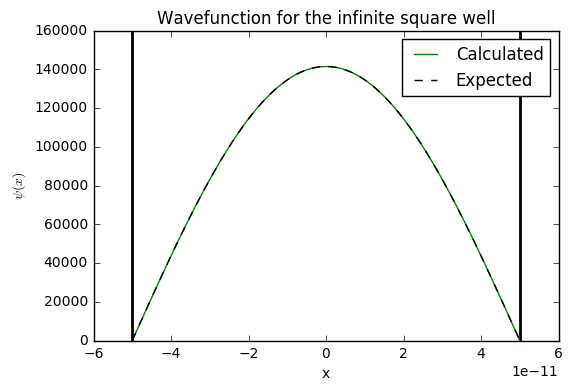

In [10]:
# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln2[0:N]/norm_const, 'g', label='Calculated') # Plot the normalised wavefunction solution
plt.plot(xpoints,np.cos(np.pi*xpoints/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The calculated and expected values are consistent with each other - success!

Let's now check that the wavefunction works with other energy levels, and plot the results. First, let's calculate the expected energies:

In [11]:
En2 =np.pi**2*hbar**2*2**2/(2*m*(2*a)**2) # n = 2
print("The energy for the n=2 state is {:2.2f}eV".format(En2/e))
En3 =np.pi**2*hbar**2*3**2/(2*m*(2*a)**2) # n = 3
print("The energy for the n=3 state is {:2.2f}eV".format(En3/e))
En4 =np.pi**2*hbar**2*4**2/(2*m*(2*a)**2) # n = 4
print("The energy for the n=4 state is {:2.2f}eV".format(En4/e))
En10 =np.pi**2*hbar**2*10**2/(2*m*(2*a)**2) # n = 10
print("The energy for the n=10 state is {:2.2f}eV".format(En10/e))
En25 =np.pi**2*hbar**2*20**2/(2*m*(2*a)**2) # n = 20
print("The energy for the n=20state is {:2.2f}eV".format(En25/e))

The energy for the n=2 state is 150.42eV
The energy for the n=3 state is 338.44eV
The energy for the n=4 state is 601.67eV
The energy for the n=10 state is 3760.44eV
The energy for the n=20state is 15041.76eV


We can then iterate the secant function around these expected energy levels. Since we'll be doing this a lot, we create a function to run this for us. The inital guess is just the approximate energy plus/minus 10 eV - as long as the range is narrow enough to converge on the energy you want, the precise values don't matter. It's worth noting that, since we can only measure the probability of the wavefunction ($|\psi|^2$), the wavefunction itself has equally valid positive and negative solutions. We therefore manipulate the energy function slightly to align with the predicted solutions from the solution equation.

In [12]:
def energy_fn(E1,E2,n):
    '''Function to calculate the wavefunction of a system
    within a range of energy eigenvalues, and return a
    normalised solution'''
    # Reinitialise the values

    phi = (-1)**(np.floor(n/2)) # Initial value of phi
    psi = 0 # Initial value of psi
    E1 = E1 * e # J - initial lower bound
    E2 = E2 * e # J - initial upper bound

    r = np.array([phi,psi]) # Array of phi and psi
    err = 1 # Initialise the error value
    
    while np.abs(E2-E1) > tolerance:
    
        soln1 = RK4(r, xpoints, E1) # solution for the first guess
        soln2 = RK4(r, xpoints, E2) # solution for the second guess

        E1, E2 = E2, E2 - soln2[N]*(E2-E1)/(soln2[N]-soln1[N])

    print("The calculated energy is", E2/e,"eV")
    norm_const = h*(np.abs(soln2[0])**2/2+np.abs(soln2[N])**2/2+np.sum(np.abs(soln2[1:N-1])**2))
    norm_const = norm_const**0.5 # Take the square root
    return(soln2/norm_const)

The calculated energy is 150.417641576 eV


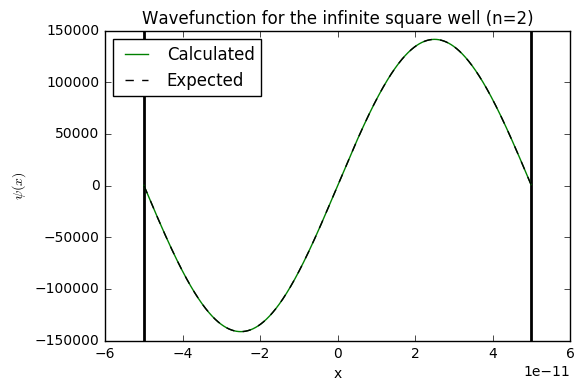

In [13]:
# For n=2 use the sin form of the wavefunction
soln2 = energy_fn(140,160,2)

# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln2[0:N], 'g', label='Calculated') # Plot the wavefunction solution
plt.plot(xpoints,np.sin(np.pi*xpoints*2/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well (n=2)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The calculated energy is 338.439693562 eV


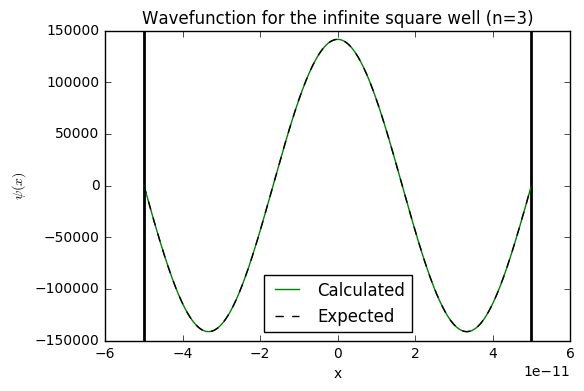

In [14]:
# For n=3 use the cos form of the wavefunction
soln3 = energy_fn(330,350,3)

# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln3[0:N], 'g', label='Calculated') # Plot the wavefunction solution
plt.plot(xpoints,np.cos(np.pi*xpoints*3/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well (n=3)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The calculated energy is 601.670566508 eV


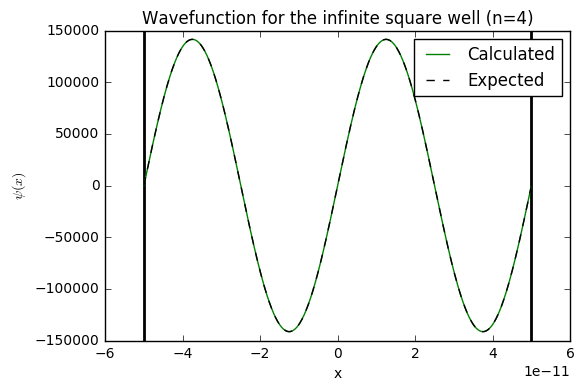

In [15]:
# For n=4 use the sin form of the wavefunction
soln4 = energy_fn(600,610,4)

# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln4[0:N], 'g', label='Calculated') # Plot the wavefunction solution
plt.plot(xpoints,np.sin(np.pi*xpoints*4/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well (n=4)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The calculated energy is 3760.44110011 eV


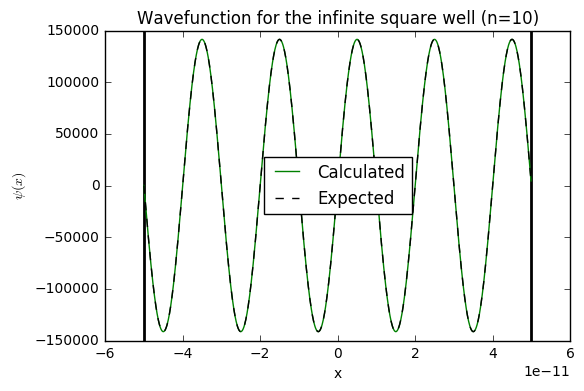

In [16]:
# For n=10 use the cos form of the wavefunction
soln10 = energy_fn(3750,3770,10)

# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln10[0:N], 'g', label='Calculated') # Plot the wavefunction solution
plt.plot(xpoints,np.sin(np.pi*xpoints*10/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well (n=10)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The calculated energy is 15041.768058 eV


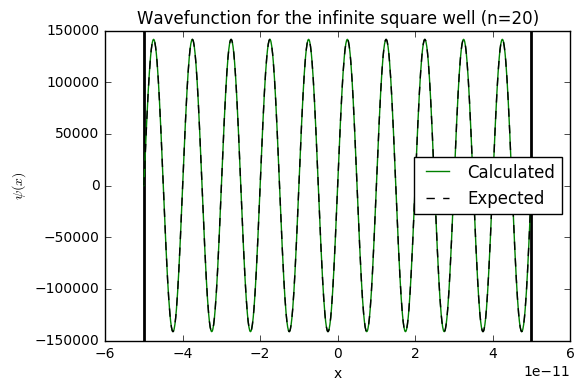

In [17]:
# For n=20 use the cos form of the wavefunction
soln20 = energy_fn(15030,15050,20)

# Plot the borders of the potential well
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)

# Plot the wavefunctions
plt.plot(xpoints,soln20[0:N], 'g', label='Calculated') # Plot the wavefunction solution
plt.plot(xpoints,np.sin(np.pi*xpoints*20/(2*a))/(a**0.5), 'k--', label="Expected")

# Label the graph and axes
plt.title('Wavefunction for the infinite square well (n=20)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

So the method also works to find eigenstates for large values of n.

## Harmonic potential

Now that we know that we can use this method for an infinite square well, we can use it for other potentials, such as the harmonic potential:
$$
V(x) = V_0 \frac{x^2}{a^2}
$$

We'll start by using a voltage of 800eV. The energy of the eigensystem takes values according to:

$$ E = \hbar \omega (n+\frac{1}{2}) $$

$$ \omega = \sqrt{\frac{2V_0}{ma^2}} $$

The wavefunction is given by:

$$
\psi_n(x) = \frac{1}{\sqrt{2^n n!}}({\frac{m\omega}{\pi\hbar}})^{1/4} e^{-\frac{m\omega x^2}{2\hbar}} H_n(\sqrt{\frac{m\omega}{\hbar}}x), \quad n=0,1,2,...
$$

Where the function $H_n$ is the Hermite polynomial. For my own sanity, wavefunctions from Wikipedia are used as a reference, rather than generating them live in the notebook.

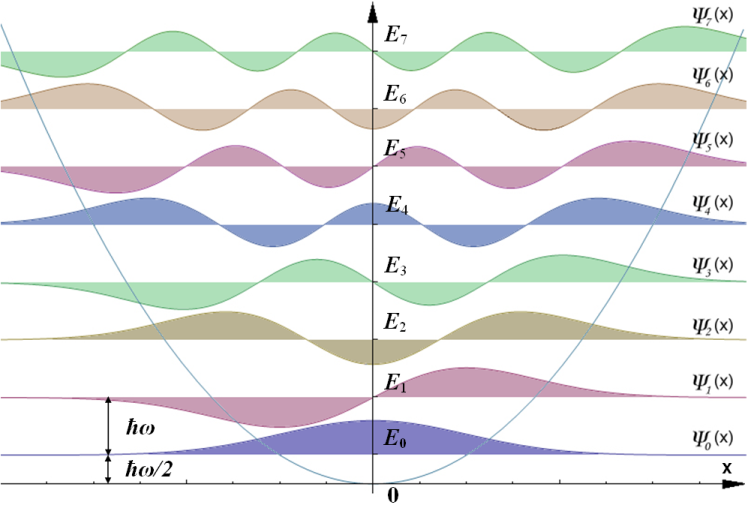

In [18]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/9/9e/HarmOsziFunktionen.png')

In [19]:
def V(x):
    '''Function to calculate the potential at a given position x'''
    V=V0*e*x**2/a**2
    if x>a:
        V=0
    return V

In [20]:
# expected energy values
V0 = 800 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e) #eV
E1 = hbar*omega*3/(2*e) #eV
E2 = hbar*omega*5/(2*e) #eV
E3 = hbar*omega*7/(2*e) #eV
print("Energy values are", E0, E1, E2, E3, "eV")

Energy values are 110.419177624 331.257532871 552.095888118 772.934243366 eV


The calculated energy is 110.859610622 eV
The calculated energy is 336.610856785 eV
The calculated energy is 580.477674494 eV
The calculated energy is 864.728367591 eV


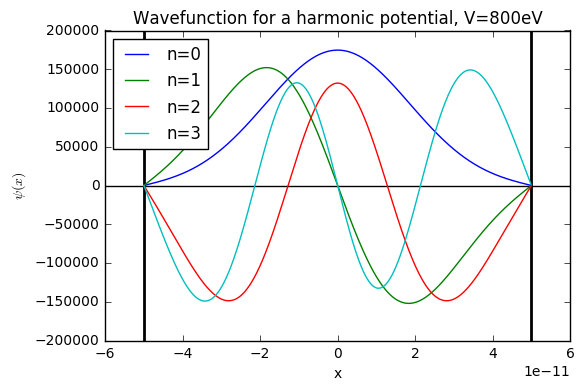

In [21]:
# solve the wavefunction for these energy values
soln0 = energy_fn(100,120,0)
soln1 = energy_fn(330,340,1)
soln2 = energy_fn(550,560,2)
soln3 = energy_fn(770,780,3)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0') # Plot the wavefunction solution
plt.plot(xpoints,soln1[0:N], label='n=1') # Plot the wavefunction solution
plt.plot(xpoints,soln2[0:N], label='n=2') # Plot the wavefunction solution
plt.plot(xpoints,soln3[0:N], label='n=3') # Plot the wavefunction solution
# Label the graph and axes
plt.title('Wavefunction for a harmonic potential, V=800eV')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

To determine the discrepancy precisely, let's rewrite the energy function to return the calculated energy and determine the percentage difference:

In [22]:
def delE_fn(E1,E2,n):
    '''Function to calculate the wavefunction of a system
    within a range of energy eigenvalues, and return a
    normalised solution'''
    # Reinitialise the values

    phi = (-1)**(np.floor(n/2)) # Initial value of phi
    psi = 0 # Initial value of psi
    E1 = E1 * e # J - initial lower bound
    E2 = E2 * e # J - initial upper bound

    r = np.array([phi,psi]) # Array of phi and psi
    err = 1 # Initialise the error value
    
    while np.abs(E2-E1) > tolerance:
    
        soln1 = RK4(r, xpoints, E1) # solution for the first guess
        soln2 = RK4(r, xpoints, E2) # solution for the second guess

        E1, E2 = E2, E2 - soln2[N]*(E2-E1)/(soln2[N]-soln1[N])

    print("The calculated energy is", E2/e,"eV")
    return(E2/e)

In [23]:
V0 = 800 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e)
E1 = hbar*omega*3/(2*e)
E2 = hbar*omega*5/(2*e)
E3 = hbar*omega*7/(2*e)

print('The expected energy is', E0, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E0-delE_fn(100,120,0))/E0*100))

print('The expected energy is', E1, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E1-delE_fn(330,340,1))/E1*100))

print('The expected energy is', E2, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E2-delE_fn(550,560,1))/E2*100))

print('The expected energy is', E3, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E3-delE_fn(770,780,1))/E3*100))

The expected energy is 110.419177624 eV
The calculated energy is 110.859610622 eV
Difference of 0.40%
The expected energy is 331.257532871 eV
The calculated energy is 336.610856785 eV
Difference of 1.62%
The expected energy is 552.095888118 eV
The calculated energy is 580.477674494 eV
Difference of 5.14%
The expected energy is 772.934243366 eV
The calculated energy is 864.728367591 eV
Difference of 11.88%


Clearly there is some deviation from the expected results in our method. As the value of n increases, the discrepancy between the expected energy and the eigenvalue energy increases. Additionally, the wavefunction becomes less symmetric, e.g. for n=3 - the right hand side of the wavefunction is more positive than the left hand side.

To investigate this further, let's change the well depth to 200 and 2000 eV:

In [24]:
# expected energy values
V0 = 200 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e) #eV
E1 = hbar*omega*3/(2*e) #eV
E2 = hbar*omega*5/(2*e) #eV
E3 = hbar*omega*7/(2*e) #eV
print("Energy values are", E0, E1, E2, E3, "eV")

Energy values are 55.2095888118 165.628766436 276.047944059 386.467121683 eV


Since the energy for n=2 and n=3 is greater than the well depth, we would expect the system to break down at these energy values:

The calculated energy is 61.0157420489 eV
The calculated energy is 204.121705457 eV
The calculated energy is 280.30545155 eV
The calculated energy is 400.862311907 eV


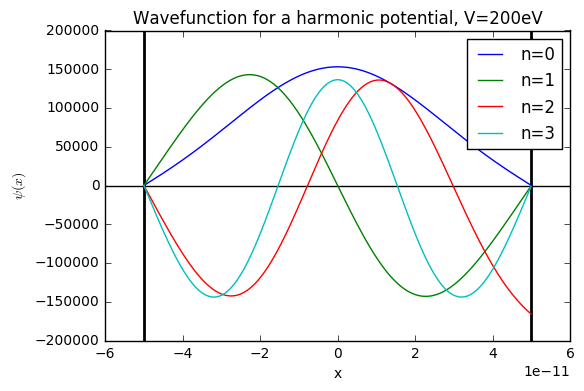

In [25]:
# solve the wavefunction for these energy values
soln0 = energy_fn(50,60,0)
soln1 = energy_fn(160,170,1)
soln2 = energy_fn(270,280,2)
soln3 = energy_fn(380,390,3)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0') 
plt.plot(xpoints,soln1[0:N], label='n=1') 
plt.plot(xpoints,soln2[0:N], label='n=2') 
plt.plot(xpoints,soln3[0:N], label='n=3') 
# Label the graph and axes
plt.title('Wavefunction for a harmonic potential, V=200eV')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

In [26]:
V0 = 200 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e)
E1 = hbar*omega*3/(2*e)
E2 = hbar*omega*5/(2*e)
E3 = hbar*omega*7/(2*e)

print('The expected energy is', E0, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E0-delE_fn(50,60,0))/E0*100))

print('The expected energy is', E1, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E1-delE_fn(160,170,1))/E1*100))

print('The expected energy is', E2, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E2-delE_fn(270,280,1))/E2*100))

print('The expected energy is', E3, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E3-delE_fn(380,390,1))/E3*100))

The expected energy is 55.2095888118 eV
The calculated energy is 61.0157420489 eV
Difference of 10.52%
The expected energy is 165.628766436 eV
The calculated energy is 204.121705457 eV
Difference of 23.24%
The expected energy is 276.047944059 eV
The calculated energy is 280.30545155 eV
Difference of 1.54%
The expected energy is 386.467121683 eV
The calculated energy is 400.862311907 eV
Difference of 3.72%


In this case, the low-n energies are much more significantly incorrect than when V=800eV, and the wavefunction for n=2 is completely unrealistic, as it is does not match the boundary conditions. Clearly V=200eV results in a worse approximation!

In [27]:
# expected energy values
V0 = 2000 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e) #eV
E1 = hbar*omega*3/(2*e) #eV
E2 = hbar*omega*5/(2*e) #eV
E3 = hbar*omega*7/(2*e) #eV
print("Energy values are", E0, E1, E2, E3, "eV")

Energy values are 174.588049327 523.76414798 872.940246634 1222.11634529 eV


The calculated energy is 174.601484853 eV
The calculated energy is 524.039869089 eV
The calculated energy is 875.458069677 eV
The calculated energy is 1235.62729704 eV


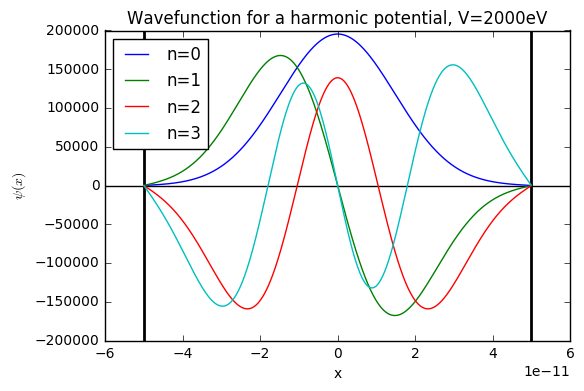

In [28]:
# solve the wavefunction for these energy values
soln0 = energy_fn(170,180,0)
soln1 = energy_fn(520,530,1)
soln2 = energy_fn(870,880,2)
soln3 = energy_fn(1220,1230,3)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0') 
plt.plot(xpoints,soln1[0:N], label='n=1') 
plt.plot(xpoints,soln2[0:N], label='n=2') 
plt.plot(xpoints,soln3[0:N], label='n=3') 
# Label the graph and axes
plt.title('Wavefunction for a harmonic potential, V=2000eV')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

In [29]:
V0 = 2000 #eV - starting value
omega = np.sqrt(2*V0*e/(m*a**2)) # s^-1
E0 = hbar*omega/(2*e)
E1 = hbar*omega*3/(2*e)
E2 = hbar*omega*5/(2*e)
E3 = hbar*omega*7/(2*e)

print('The expected energy is', E0, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E0-delE_fn(170,180,0))/E0*100))

print('The expected energy is', E1, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E1-delE_fn(520,530,1))/E1*100))

print('The expected energy is', E2, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E2-delE_fn(870,880,1))/E2*100))

print('The expected energy is', E3, 'eV')
print('Difference of {:2.2f}%'.format(np.abs(E3-delE_fn(1220,1230,1))/E3*100))

The expected energy is 174.588049327 eV
The calculated energy is 174.601484853 eV
Difference of 0.01%
The expected energy is 523.76414798 eV
The calculated energy is 524.039869089 eV
Difference of 0.05%
The expected energy is 872.940246634 eV
The calculated energy is 875.458069677 eV
Difference of 0.29%
The expected energy is 1222.11634529 eV
The calculated energy is 1235.62729704 eV
Difference of 1.11%


Here the energy eigenvalues are more consistent with the expected eigenvalues. This suggests that the Runge-Kutta function works better as we get closer to approximating the infinite square well.

## Finite Square Well

We can also consider the finite square well:
$$
V_x = \begin{cases} 0 & \text{if } -a/2 < x < +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

Here, the wavefunction has a sinusoidal form inside the well, and exponentially decays outside it, as shown again by Wikipedia:

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Finite-well-solutions.gif">

The energy of the finite square well cannot be solved analyitically, so we use trial and error to find the initial values.

In [30]:
def V(x):
    '''Function to calculate the potential at a given position x.
    Inside the finite square well, the potential is zero
    for all values of x, and fixed at V0 outside the well.'''
    V0=500*e
    if np.abs(x)>a/2:
        V=V0
    elif np.abs(x)<a/2:
        V=0
    return V

The calculated energy is 81.7932855017 eV
The calculated energy is 311.578332745 eV
The calculated energy is 1191.05429927 eV
The calculated energy is 3286.27836797 eV


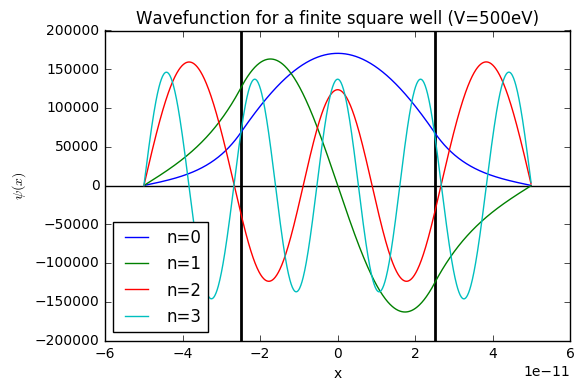

In [31]:
soln0 = energy_fn(0,150,0)
soln1 = energy_fn(150,350,0)
soln2 = energy_fn(350,1000,0)
soln3 = energy_fn(1000,2000,0)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a/2,c='k',ls='-',lw=2)
plt.axvline(x=a/2,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0') # Plot the wavefunction solution
plt.plot(xpoints,soln1[0:N], label='n=1') # Plot the wavefunction solution
plt.plot(xpoints,soln2[0:N], label='n=2') # Plot the wavefunction solution
plt.plot(xpoints,soln3[0:N], label='n=3') # Plot the wavefunction solution
# Label the graph and axes
plt.title('Wavefunction for a finite square well (V=500eV)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

For higher order wavefunctions, this method clearly breaks down. This is because if the well potential is less than the energy of the particle, the particle tunnels through the well, which is not accounted for in our model. Assuming the energy of the particle is always less than the potential of the well, we get the following:

In [32]:
def V(x):
    '''Function to calculate the potential at a given position x.
    Inside the finite square well, the potential is zero
    for all values of x, and fixed at V0 outside the well.'''
    V0=2000*e
    if np.abs(x)>a/2:
        V=V0
    elif np.abs(x)<a/2:
        V=0
    return V

The calculated energy is 108.725379647 eV
The calculated energy is 430.978821785 eV
The calculated energy is 951.804835779 eV
The calculated energy is 1626.26054588 eV


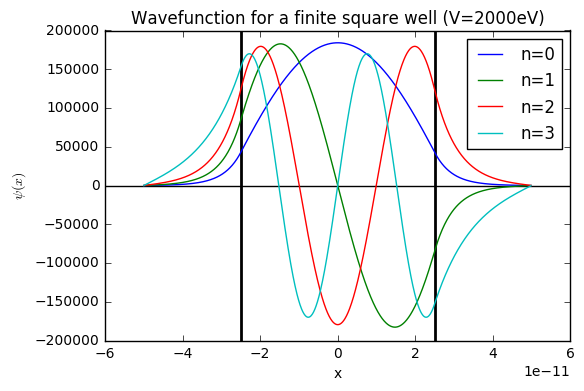

In [33]:
soln0 = energy_fn(0,150,0)
soln1 = energy_fn(150,500,0)
soln2 = energy_fn(500,1000,0)
soln3 = energy_fn(1000,1800,0)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a/2,c='k',ls='-',lw=2)
plt.axvline(x=a/2,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0')
plt.plot(xpoints,soln1[0:N], label='n=1')
plt.plot(xpoints,soln2[0:N], label='n=2')
plt.plot(xpoints,soln3[0:N], label='n=3')
# Label the graph and axes
plt.title('Wavefunction for a finite square well (V=2000eV)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

Which, excluding the error in the Runge-Kutta function discussed earlier, is the expected result.

## Other Potentials
What if the potential forms a 'V' shape around the centre, and is infinite outside the well, such that:

$$
V_x = \begin{cases} -V_0~x & \text{if } -a < x < 0, \\ 
    V_0~x  & \text{if } 0 < x < a, \end{cases} 
$$

Let's investigate this using a large potential gradient, of 2000eV:

In [34]:
def V(x):
    '''Function to calculate the potential at a given position x.
    Inside the well, the potential is a V shape
    for all values of x, and fixed at 0 outside the well.'''
    V0=2000*e
    V = np.abs(V0*x)
    return V

We find the energy using trial and error:

In [35]:
i = 0
while i <=20: # Loop over all 100eV intervals between 0 and 2000
    soln = energy_fn(i*50,(i+1)*50,i)
    i+=1

The calculated energy is 37.604410442 eV
The calculated energy is 150.417641617 eV
The calculated energy is 150.41764161 eV
The calculated energy is 150.417641652 eV
The calculated energy is 338.439693424 eV
The calculated energy is 338.43969361 eV
The calculated energy is 338.43969361 eV
The calculated energy is 338.439693609 eV
The calculated energy is 338.439693609 eV
The calculated energy is 338.439693645 eV
The calculated energy is 601.670566553 eV
The calculated energy is 601.670566551 eV
The calculated energy is 601.670566553 eV
The calculated energy is 601.670566552 eV
The calculated energy is 338.43969361 eV
The calculated energy is 1353.75877697 eV
The calculated energy is 940.110260773 eV
The calculated energy is 940.110260776 eV
The calculated energy is 940.110260772 eV
The calculated energy is 940.110260768 eV
The calculated energy is 940.110260785 eV


The calculated energy is 37.6044104591 eV
The calculated energy is 150.417641617 eV
The calculated energy is 338.439693615 eV
The calculated energy is 601.670566558 eV


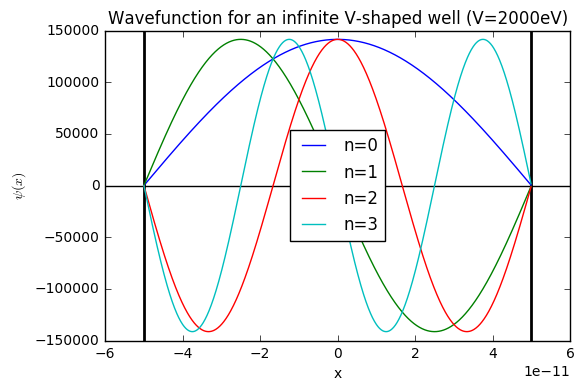

In [36]:
soln0 = energy_fn(30,40,0)
soln1 = energy_fn(150,160,1)
soln2 = energy_fn(330,340,2)
soln3 = energy_fn(600,610,3)

# Plot the borders of the potential well, and the x-axis
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axhline(y=0,c='k',ls='-',lw=1)

# Plot the wavefunctions
plt.plot(xpoints,soln0[0:N], label='n=0') # Plot the wavefunction solution
plt.plot(xpoints,soln1[0:N], label='n=1') # Plot the wavefunction solution
plt.plot(xpoints,soln2[0:N], label='n=2') # Plot the wavefunction solution
plt.plot(xpoints,soln3[0:N], label='n=3') # Plot the wavefunction solution
# Label the graph and axes
plt.title('Wavefunction for an infinite V-shaped well (V=2000eV)')
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.legend(loc=0)

The wavefunction therefore forms a standing wave between the two walls, with nodes of maximum probability evenly distributed between nodes of minimum probability. This is the same result as the infinite square well, which suggests that the V-shaped potential has little effect on the energy or wavefunction of the system.

# Conclusion
This has been a Jupyter Notebook to find energy eigenvalues and wavefunctions for particles in a range of potential wells. The energy levels of ground and excited states have been determined for a particle in an infinite square well, a harmonic potential, a finite square well, and an infinite V-shaped well, and the corresponding wavefunctions plotted.

Comparison with expected results show that this method is highly accurate for an infinite square well, and less accurate for the harmonic potential. This is likely due to an error in the Runge-Kutta method, as inaccuracies remain even after increasing the potential used (which makes the system closer to an infinite square well, which is more accurate). Each of the calculated wavefunctions are consistent with the expected wavefunctions, meaning this notebook can be used to predict the wavefunction of more complex potentials, such as a V-shaped well.

# References
[1]	A. I. M. Rae, Quantum mechanics, fourth edition. United States: Taylor & Francis, 2002.